In [33]:
!pip install xgboost

In [1]:
#Importing the pandas library.
import pandas as pd

In [2]:
#Read the dataframes.
df = pd.read_csv('C:/Users/Makro_1997/Churn_Modelling.csv')

In [3]:
#Data top 5 head valus.
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [33]:
#Quick summary of the data set.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
#importing librays for visualization.
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
corre = df.corr()

<AxesSubplot:>

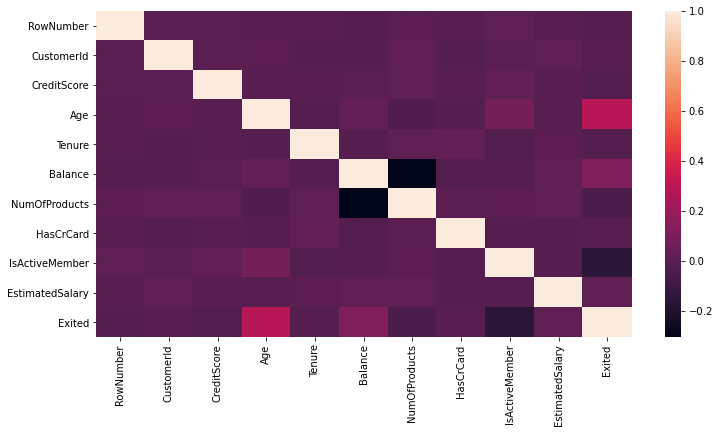

In [6]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr())


In [7]:
#Shape of the data set.
df.shape

(10000, 14)

In [8]:
#Spliting the data into x and y variables.
x = df.iloc[0:500,3:13].values
y = df.iloc[0:500,13].values

In [9]:
x.shape

(500, 10)

In [10]:
y.shape

(500,)

In [11]:
print(x)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [806 'France' 'Male' ... 1 1 142838.64]
 [757 'Germany' 'Male' ... 1 1 127059.04]
 [570 'France' 'Female' ... 0 1 116503.92]]


In [12]:
y

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,

In [13]:
#converting the string into catacerigal values.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,1] = le.fit_transform(x[:,1])
x[:,2] = le.fit_transform(x[:,2])

In [14]:
x

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [806, 0, 1, ..., 1, 1, 142838.64],
       [757, 1, 1, ..., 1, 1, 127059.04],
       [570, 0, 0, ..., 0, 1, 116503.92]], dtype=object)

In [15]:
#Importing the manual hyper perameter library.
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import xgboost

In [16]:
classifier = xgboost.XGBClassifier()

In [17]:
#Creating Hyper perameter tuning vlaues.
params =  {
    'learning_rate' : [0.5,0.10,0.15,0.20,0.25,0.30,0.35,0.40],
    'max_depth' : [2,3,5,7,8,9,11,12,14,15],
    'mini_chid_weight':[1,2,4,5,7],
    'gama':[0.1,0.2,0.3,0.4,0.5],
    'colsample_bytree':[0.1,0.2,0.4,0.5]}

In [18]:
random_search = RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,cv=5,verbose=3,scoring='roc_auc',n_jobs=-1)

In [19]:
random_search.fit(x,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[14:19:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gama", "mini_chid_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=Non

In [20]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gama=0.5, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=2, max_leaves=0,
              min_child_weight=1, mini_chid_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [21]:
random_search.best_params_

{'mini_chid_weight': 1,
 'max_depth': 2,
 'learning_rate': 0.1,
 'gama': 0.5,
 'colsample_bytree': 0.4}

In [27]:
classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree',
              colsample_bylevel=1,colsample_bytree=0.5,
              learning_rate=0.35, max_delta_step=0,
              min_child_weight=1,
              n_estimators=100, n_jobs=0,
              num_parallel_tree=1)

In [28]:
from sklearn.model_selection import cross_val_score
predit = cross_val_score(classifier,x,y,cv=10)

In [29]:
predit

array([0.84, 0.8 , 0.78, 0.8 , 0.78, 0.8 , 0.84, 0.8 , 0.82, 0.8 ])

In [32]:
predit.mean()

0.806